In [2]:
pip install jupyter opencv-python numpy pandas scikit-learn matplotlib tensorflow keras tqdm

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cont

In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
DATASET_PATH = "data/raw/Yawn_Eye_Dataset/train"
CATEGORIES = ["Closed", "Open", "yawn", "no_yawn"]
IMG_SIZE = 64

In [21]:
data = []

for label, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATASET_PATH, category)
    for img_file in tqdm(os.listdir(folder_path), desc=category):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, label])

print("Total images loaded:", len(data))

no_yawn: 100%|██████████| 616/616 [00:03<00:00, 172.18it/s]

Total images loaded: 2467


In [22]:
X = np.array([item[0] for item in data]) / 255.0
y = np.array([item[1] for item in data])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2467, 64, 64, 3)
y shape: (2467,)


In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, stratify=y_temp, random_state=42)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (1726, 64, 64, 3)
Validation: (496, 64, 64, 3)
Test: (245, 64, 64, 3)


In [ ]:
os.makedirs("data/processed", exist_ok=True)

np.save("data/processed/X_train.npy", X_train)
np.save("data/processed/y_train.npy", y_train)
np.save("data/processed/X_val.npy", X_val)
np.save("data/processed/y_val.npy", y_val)
np.save("data/processed/X_test.npy", X_test)
np.save("data/processed/y_test.npy", y_test)

print("Preprocessing complete! Data saved in 'data/processed/' folder.")

Preprocessing complete! Data saved in 'data/processed/' folder.


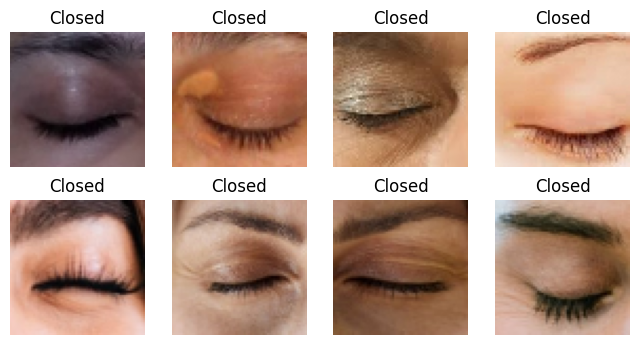

In [26]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X[i])
    plt.title(CATEGORIES[y[i]])
    plt.axis('off')
plt.show()